In [1]:
import tensorflow as tf

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

#pre trained model:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [41]:
#Explorative Data Analysis
os.listdir(r'C:\Users\Dell\Python stuff\Defective leaf detection\Train')

['Apple Black Rot',
 'Apple Healthy',
 'Apple Scab',
 'Bell pepper Bacterial Spot',
 'Bell pepper Healthy',
 'Cedar Apple Rust',
 'Cherry Healthy',
 'Cherry Powdery Mildew']

In [10]:
len(os.listdir(r'C:\Users\Dell\Python stuff\Defective leaf detection\Train'))

8

In [11]:
 # Hence we have 8 classes of diseases in our training set

In [17]:
# Now we load our image data
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range = 0.3,
                           horizontal_flip = True, 
                           preprocessing_function = preprocess_input  )

#validation generator
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input )

In [18]:
train = train_datagen.flow_from_directory(directory= r'C:\Users\Dell\Python stuff\Defective leaf detection\Train', target_size = (256,256), batch_size=32)
val = val_datagen.flow_from_directory(directory= r'C:\Users\Dell\Python stuff\Defective leaf detection\Val', target_size = (256,256), batch_size=32)

Found 15181 images belonging to 8 classes.
Found 3412 images belonging to 8 classes.


In [29]:
t_img, label = next(train)

In [35]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


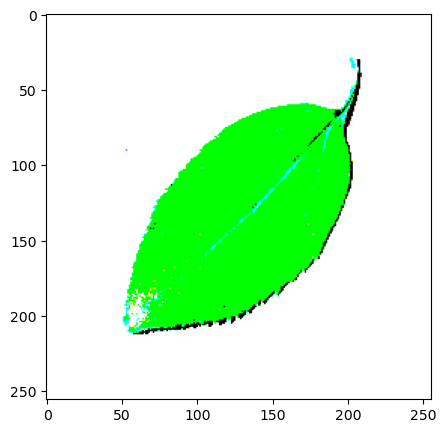

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


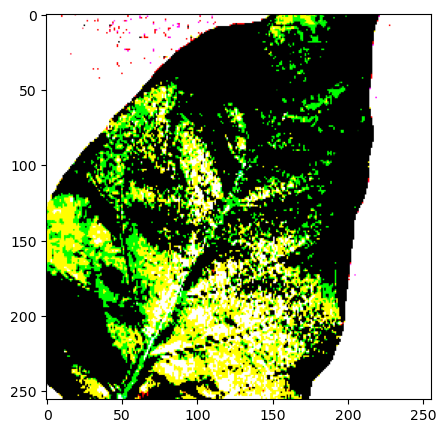

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


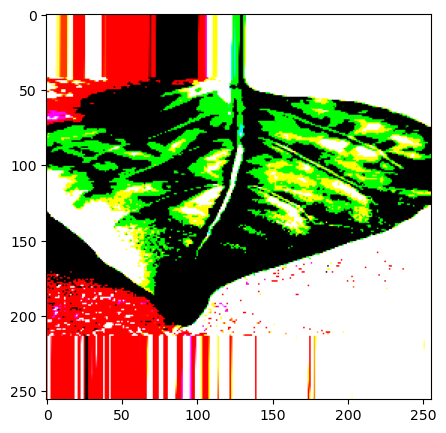

In [36]:
plotImage(t_img[:3], label[:3])

In [37]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im/255)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


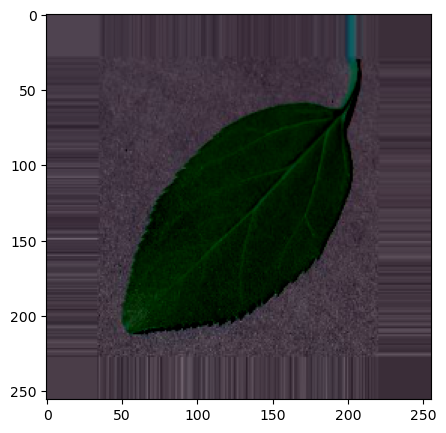

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


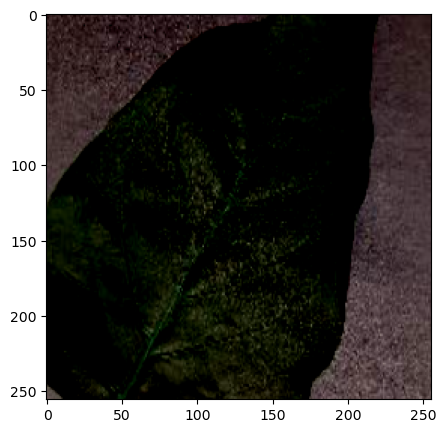

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


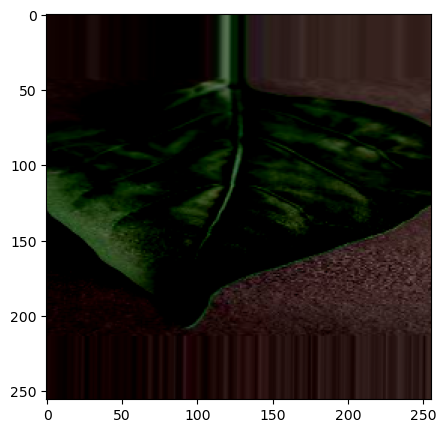

In [38]:
plotImage(t_img[:3], label[:3])

In [39]:
# Building our model

In [43]:
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
import keras

In [44]:
base_model = VGG19(input_shape = (256,256,3),include_top = False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [45]:
for label in base_model.layers:
    label.trainable = False

In [47]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [49]:
X = Flatten()(base_model.output)
X = Dense(units = 8, activation = 'softmax')(X)

# Creating the model
model = Model(base_model.input, X)

In [50]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │       262,152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,286,536 (77.39 MB)

 Trainable params: 262,152 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [51]:
#1 we imported our data
#2 we tried to preprocess our data
#3 tried to see the data
#4 we created model

In [62]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', 
                     verbose=1, save_best_only=True)

# Combine both callbacks into a list
cb = [es, mc]


In [67]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
his = model.fit(train, 
                steps_per_epoch=16, 
                epochs=50, 
                verbose=1, 
                callbacks=cb, 
                validation_data=val, 
                validation_steps=16)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8226 - loss: 3.8714
Epoch 1: val_accuracy improved from 0.90625 to 0.93359, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 196s 12s/step - accuracy: 0.8220 - loss: 3.8756 - val_accuracy: 0.9336 - val_loss: 0.9179
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8466 - loss: 2.6224
Epoch 2: val_accuracy did not improve from 0.93359
16/16 ━━━━━━━━━━━━━━━━━━━━ 193s 12s/step - accuracy: 0.8456 - loss: 2.6564 - val_accuracy: 0.9062 - val_loss: 1.9849
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8392 - loss: 3.2884
Epoch 3: val_accuracy did not improve from 0.93359
16/16 ━━━━━━━━━━━━━━━━━━━━ 192s 12s/step - accuracy: 0.8414 - loss: 3.2588 - val_accuracy: 0.9258 - val_loss: 1.2501
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8381 - loss: 3.6243
Epoch 4: val_accuracy improved from 0.93359 to 0.93555, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 194s 13s/s

In [68]:
h = his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

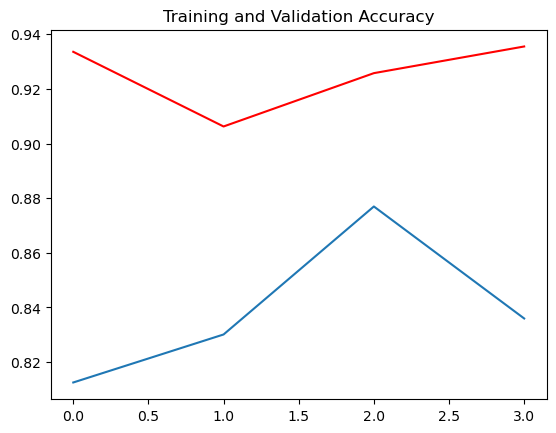

In [70]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Training and Validation Accuracy")
plt.show()

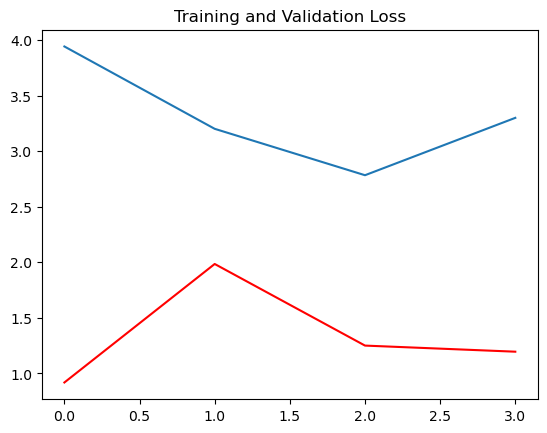

In [71]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Training and Validation Loss")
plt.show()

In [72]:
# loading best model
from keras.models import load_model

model = load_model(r'C:\Users\Dell\Python stuff\Defective leaf detection\best_model.keras')

In [74]:
acc = model.evaluate(val)[1]

print(f"The accuracy of the model is {acc*100}%")

107/107 ━━━━━━━━━━━━━━━━━━━━ 602s 6s/step - accuracy: 0.9351 - loss: 1.1916
The accuracy of the model is 93.08323860168457%


In [97]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))
ref

{0: 'Apple Black Rot',
 1: 'Apple Healthy',
 2: 'Apple Scab',
 3: 'Bell pepper Bacterial Spot',
 4: 'Bell pepper Healthy',
 5: 'Cedar Apple Rust',
 6: 'Cherry Healthy',
 7: 'Cherry Powdery Mildew'}

In [100]:
def prediction(path):
    img = load_img(path, target_size = (256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img  = np.expand_dims(im, axis = 0)
    pred = np.argmax(model.predict(img))
    print(f"The image belongs to {ref[pred]}.")

In [101]:
path = r'C:\Users\Dell\Python stuff\Defective leaf detection\Apple\Test\Cedar Apple Rust\3e123b1b-a57d-4689-8211-e270c19fd4a9___FREC_C.Rust 9962.JPG'
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
The image belongs to Cedar Apple Rust.
